<a href="https://colab.research.google.com/github/stev3j/MachineLearning_Practice/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
fish_input = fish[['Weight',	'Length',	'Diagonal',	'Height',	'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
fish_input

In [ ]:
fish_target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [13]:
# 데이터 표준화 전처리?

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
train_scaled

In [ ]:
train_input

In [42]:
# 확률적 경사 하강법?

# 경사 하강법 : 예측 모델을 만들기 위해서 실제 값과 예측값과의 에러가 최소가 되도록 조정해 나가는 방법
# 확률적 경사 하강법 : 무작위로 한 개의 샘플 데이터셋을 추출해 그 샘플에 대해서만 기울기를 계산하는 방법

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # max_iter : 반복 횟수
sc.fit(train_scaled, train_target)

sc.score(train_scaled, train_target) # 0.773109243697479
sc.score(test_scaled, test_target) # 0.775

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.775

In [32]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 0.8151260504201681  0.85
# 0.7815126050420168  0.8
# 0.8067226890756303  0.8
# 0.8487394957983193  0.85
# 0.8571428571428571  0.9
# 0.8487394957983193  0.9
# 0.865546218487395 0.9
# 0.8487394957983193 0.9
# 0.8571428571428571 0.9
# 0.8487394957983193 0.9

0.8487394957983193
0.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


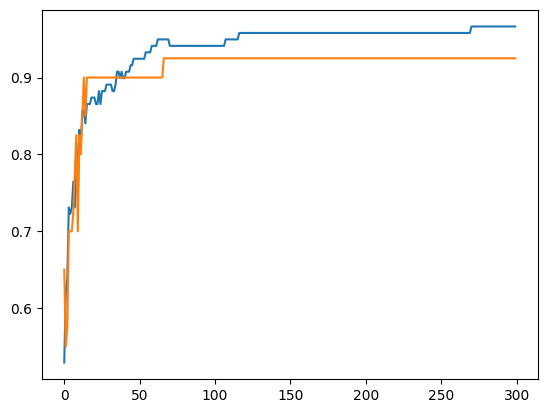

In [43]:
# 최적의 반복 횟수 구하기

import numpy as np
import matplotlib.pyplot as plt

sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # unique : 특성들 가져옴

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [40]:
# 최적의 반복 횟수로 학습하기

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # max_iter : 반복 횟수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 0.957983193277311
print(sc.score(test_scaled, test_target)) # 0.925

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
